In [2]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.


In [1]:
!pip install konlpy > /dev/null

������ ��θ� ã�� �� �����ϴ�.


In [15]:
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
path = plt.rc('font', family='Malgun Gothic')

## 한글 텍스트 전처리

In [5]:
with open('data/gift.txt', encoding='utf-8') as fp:
    text = fp.read()

In [6]:
from konlpy.tag import Okt
okt = Okt()

In [7]:
tokens = okt.nouns(text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [8]:
# 영문자, 숫자 제거
import re
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:
        new_tokens.append(item)

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- 아래 두 과정을 반복해서 불용어를 정리

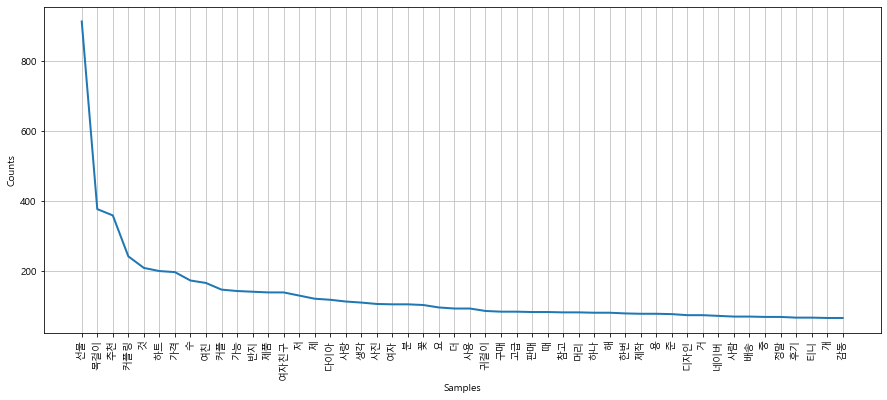

In [10]:
gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [16]:
stoptext = """
    선물 추천 것 가격 수 기능 제품 저 제 생각 여자 여자친구 사용 요 더 꽃 구매 고급
    판매 때 참고 머리 하나 해 한번 제작 용 준 디자인 거 네이버 사람 배송 중 후기 감동
    하트 여친 커플 가능 사랑 인기 상품 직접 브랜드 선택 곳 모양 마감 요즘 노늘 가지 남녀
    그냥 위 페이 마음 부담 오늘 남자 협찬 전 핸드 의미 도움 색상 아래 포장 처 조금 하루 정도
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:]

['반지',
 '목걸이',
 '가디건',
 '모자',
 '신지',
 '몇개',
 '투척',
 '클래식',
 '커플룩',
 '버핏',
 '빅사',
 '이즈',
 '하프',
 '니트',
 '가디건',
 '공용',
 '체크',
 '라인',
 '버핏',
 '가디건',
 '커플룩',
 '로파',
 '웨어',
 '버핏',
 '가디건',
 '봄',
 '가을',
 '겨울',
 '루즈',
 '핏',
 '니트',
 '공용',
 '버핏',
 '스냅',
 '가디건',
 '공용',
 '버핏',
 '패턴',
 '니트',
 '가디건',
 '컬러',
 '신상',
 '남여',
 '가을',
 '겨울',
 '버핏',
 '넥',
 '니트',
 '가디건',
 '가디건',
 '공용',
 '버핏',
 '체크',
 '브이넥',
 '버튼',
 '가디건',
 '컬러',
 '남여',
 '공용',
 '아우',
 '터',
 '루즈',
 '핏',
 '이드',
 '카라',
 '커플룩',
 '가디건',
 '레인보우',
 '영문',
 '레터',
 '링',
 '포인트',
 '블랙',
 '볼캡',
 '모자',
 '야구모',
 '모자',
 '쇼핑',
 '채택',
 '파트너',
 '스',
 '커미션',
 '지급',
 '샵',
 '수호',
 '돼지',
 '디',
 '퓨저',
 '메이드',
 '샵',
 '샵',
 '공장',
 '율',
 '또',
 '개지',
 '림',
 '마크',
 '곤잘레스',
 '후드',
 '티',
 '스몰',
 '사인',
 '로고',
 '후디',
 '그레이',
 '노미',
 '네이션',
 '컴포저블',
 '팔찌',
 '개',
 '링크',
 '골',
 '세상',
 '단',
 '팔찌',
 '노미',
 '네이션',
 '클래식',
 '링크',
 '아이돌',
 '자주',
 '착용',
 '연예인',
 '선호',
 '주얼리',
 '진행',
 '고해',
 '이니셜',
 '탄생석',
 '별자리',
 '링크',
 '팔찌',
 '강',
 '다니엘',
 '팔찌',
 '하니',
 '팔찌',
 '도',
 '소재',
 '최고급',
 

## 워드 클라우드 그리기

In [13]:
from wordcloud import WordCloud
from PIL import Image

In [21]:
data = gift.vocab().most_common(300)
wc = WordCloud(
        font_path= 'C:\Windows\Fonts\BlackHanSans-Regular.ttf', relative_scaling=0.2,
        background_color='white'
).generate_from_frequencies(dict(data))

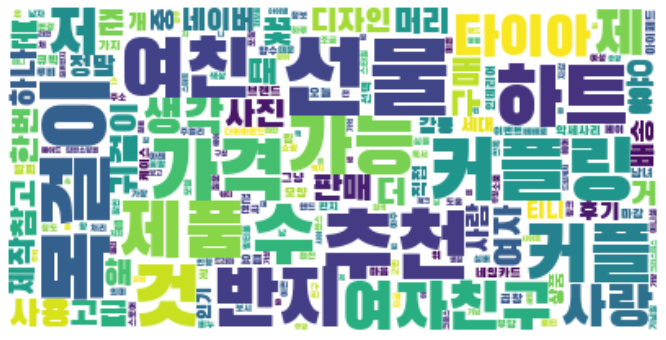

In [22]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()